# Library Import

In [228]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data  Loading

In [231]:
# 2. Load Dataset
df = pd.read_csv("Diwali_Sales_Data.csv",encoding="latin1")

In [233]:
df.shape

(11251, 15)

# Data Inspection

In [236]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [238]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [242]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [244]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [246]:
df.duplicated().sum()

8

# Data Cleaning

In [249]:
# Drop useless columns
df.drop(columns=['Status', 'unnamed1'], inplace=True)
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


In [251]:
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [253]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [257]:
df.drop_duplicates(inplace=True)

In [259]:
df.duplicated().sum()

0

# Univariate EDA Steps

### What is the distribution of customers based on Gender, and which gender forms the majority of buyers ? 

In [268]:
print(df['Gender'].value_counts())

Gender
F    7838
M    3405
Name: count, dtype: int64


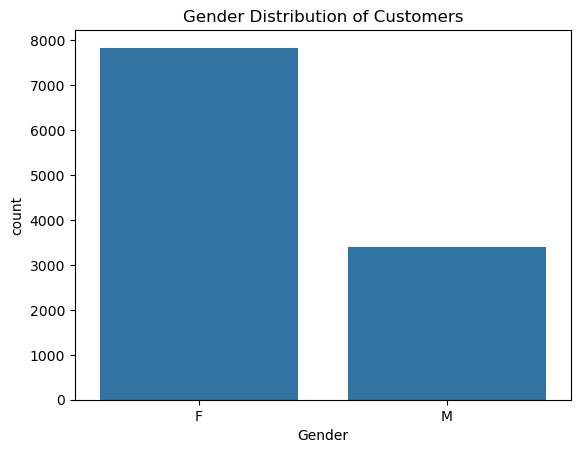

In [270]:
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution of Customers")
plt.show()

### What is the distribution of customers across different Age Groups, and which age group contributes the most buyers?

In [22]:
print(df['Age Group'].value_counts())

Age Group
26-35    4538
36-45    2285
18-25    1878
46-50     987
51-55     831
55+       428
0-17      296
Name: count, dtype: int64


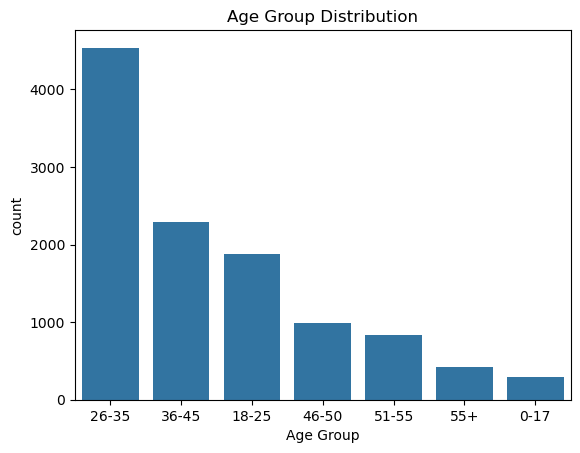

In [272]:
sns.countplot(x="Age Group", data=df, order=df["Age Group"].value_counts().index)
plt.title("Age Group Distribution")
plt.show()

#### Which states have the highest number of customers ?

In [25]:
print(df['State'].value_counts())

State
Uttar Pradesh       1944
Maharashtra         1523
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              428
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64


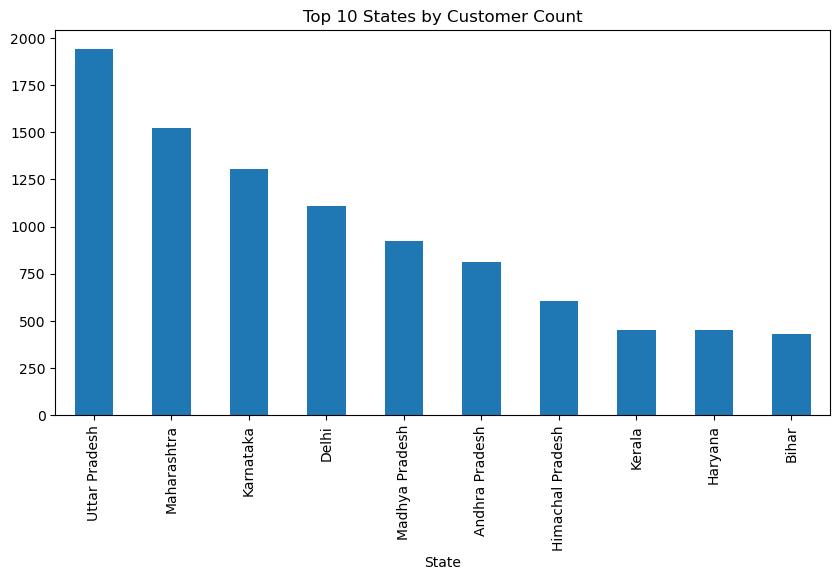

In [274]:
df['State'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Customer Count")
plt.show()

### What is the distribution of customers across different Occupations, and which occupation group dominates the customer base?

In [28]:
print(df['Occupation'].value_counts())

Occupation
IT Sector          1586
Healthcare         1408
Aviation           1309
Banking            1139
Govt                854
Hospitality         702
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             350
Agriculture         282
Name: count, dtype: int64


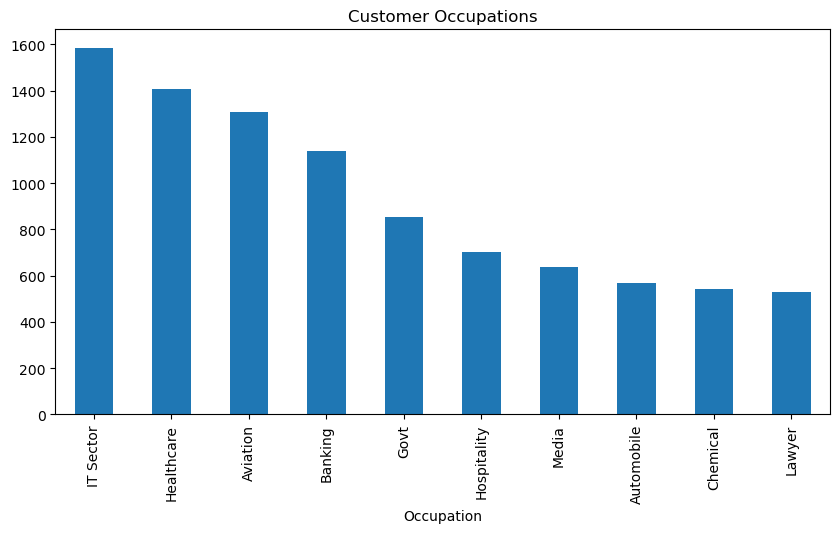

In [276]:
df['Occupation'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Customer Occupations")
plt.show()

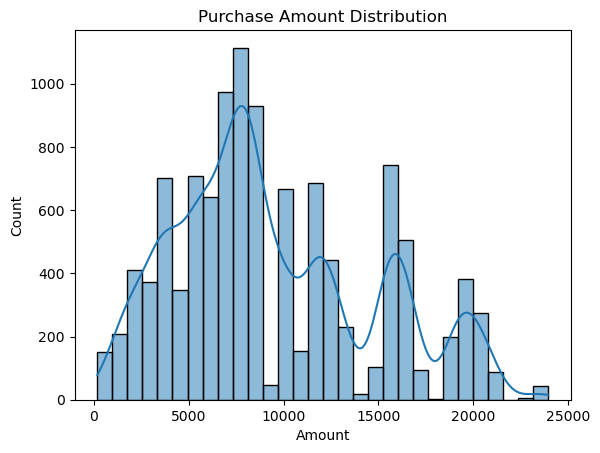

In [30]:
# Amount Distribution
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Purchase Amount Distribution")
plt.show()

#### Who are the top 10 customers by total purchase amount?

 # Bivariate Analysis

In [35]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# gender

#### Which product categories are purchased the most by male and female customers, and what are the top 5 categories based on purchase frequency?

In [52]:
counts = df[['Product_Category', 'Gender']].value_counts().unstack(fill_value=0)

print("\nTop 5 Product Categories by Gender:")
print(counts.sort_values(by=['M','F'], ascending=False).head(5))



Top 5 Product Categories by Gender:
Gender                    F    M
Product_Category                
Clothing & Apparel     1854  799
Food                   1774  719
Electronics & Gadgets  1472  610
Footwear & Shoes        786  278
Household items         284  236


### insight

#### Clothing and Apparel and Food  products category are  mostly purchased  by Female and Male .Female customers dominate purchases across all top 5 categories, especially in Clothing & Apparel and Food, making them the key buyers. Male purchases are comparatively lower but closer in Household items.

#### Which gender contributes more in terms of orders and total purchase amount?

In [58]:
df.groupby('Gender')['Orders'].sum()

Gender
F    19554
M     8427
Name: Orders, dtype: int64

In [60]:
df.groupby('Gender')['Amount'].sum().head(5)

Gender
F    74388772.43
M    31887364.00
Name: Amount, dtype: float64

### Insight

#### Female customers not only placed more orders but also contributed a significantly higher purchase amount compared to male customers.
#### This indicates that female buyers are the dominant customer segment in this dataset, both in terms of volume (orders) and value (amount).

# age_group

### How do different Age Groups compare in terms of product category preferences, total orders, total purchase amount, and average purchase amount?

In [68]:
counts = df[['Age Group', 'Product_Category']].value_counts().head()
print("\nCount of Product Categories by Age Group:")
print(counts)


Count of Product Categories by Age Group:
Age Group  Product_Category     
26-35      Clothing & Apparel       1056
           Food                      992
           Electronics & Gadgets     828
36-45      Clothing & Apparel        532
18-25      Food                      478
Name: count, dtype: int64


In [70]:
print("\nTotal Orders by Age Group:")
print(df.groupby('Age Group')['Orders'].sum().sort_values(ascending=False))


Total Orders by Age Group:
Age Group
26-35    11381
36-45     5693
18-25     4646
46-50     2379
51-55     2115
55+       1077
0-17       690
Name: Orders, dtype: int64


In [71]:
print("\nTotal Amount by Age Group:")
print(df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False))


Total Amount by Age Group:
Age Group
26-35    42597986.94
36-45    22159463.49
18-25    17235530.00
46-50     9240280.00
51-55     8254127.00
55+       4089096.00
0-17      2699653.00
Name: Amount, dtype: float64


In [72]:
print("\nAverage Amount by Age Group:")
print(df.groupby('Age Group')['Amount'].mean().sort_values(ascending=False))



Average Amount by Age Group:
Age Group
51-55    9932.764140
36-45    9697.795838
55+      9553.962617
26-35    9386.951728
46-50    9361.985816
18-25    9177.598509
0-17     9120.449324
Name: Amount, dtype: float64


### Insights on Age Groups

#### Product Category Preference: Clothing & Apparel and Food are the most purchased categories, especially among the 26–35 and 36–45 age groups.

#### Total Orders: The 26–35 age group placed the maximum number of orders (11,381), making them the most active buyers.

#### Total Purchase Amount: The 26–35 age group also contributed the highest total revenue (₹42,59,4899.0 approx).

#### Average purchase amount is highest for the 51-55 age group (₹9.9k),  followed by 36-45 (₹9.6k) and 55+ (₹9.5k).

# Marital_status

### How do married vs unmarried customers differ in terms of product category preference, total orders, and total purchase amount?

In [81]:
print("\nCount of Product Categories by Marital Status:")
# counts = df[['Marital_Status', 'Product_Category']].value_counts().unstack(fill_value=0
counts = df[['Marital_Status', 'Product_Category']].value_counts().sort_values(ascending=False).head()
print(counts)



Count of Product Categories by Marital Status:
Marital_Status  Product_Category     
0               Clothing & Apparel       1533
                Food                     1501
                Electronics & Gadgets    1172
1               Clothing & Apparel       1120
                Food                      992
Name: count, dtype: int64


In [84]:
print("\nTotal Orders by Marital Status:")
print(df.groupby('Marital_Status')['Orders'].sum().sort_values(ascending=False))



Total Orders by Marital Status:
Marital_Status
0    16243
1    11738
Name: Orders, dtype: int64


In [86]:
print("\nTotal Amount Spent by Marital Status:")
print(df.groupby('Marital_Status')['Amount'].sum().sort_values(ascending=False))



Total Amount Spent by Marital Status:
Marital_Status
0    62131172.44
1    44144963.99
Name: Amount, dtype: float64


#### insight by Marital_Status

#### Product Category Preference: Clothing & Apparel and Food are the most purchased categories across both married and unmarried customers.
#### Total Orders: Unmarried customers placed the maximum number of orders (16,243), compared to married customers (11,738).
#### Total Purchase Amount: Unmarried customers contributed the highest total revenue (₹62M approx), while married customers contributed around ₹44M.

# zone

### How do Product Categories, Orders, Revenue (Amount), and Occupations vary across different Zones ?

In [97]:
print("\nCount of Product Categories by Zone:")
zone_product = df[['Zone', 'Product_Category']].value_counts().sort_values(ascending=False).head()
print(zone_product)



Count of Product Categories by Zone:
Zone      Product_Category  
Central   Food                  990
          Clothing & Apparel    913
Western   Food                  582
Southern  Clothing & Apparel    578
Central   Footwear & Shoes      577
Name: count, dtype: int64


In [99]:
print("\nTotal Orders by Zone:")
zone_orders = df.groupby('Zone')['Orders'].sum()
print(zone_orders.sort_values(ascending=False))



Total Orders by Zone:
Zone
Central     10636
Southern     6744
Western      4866
Northern     3724
Eastern      2011
Name: Orders, dtype: int64


In [101]:
print("\nTotal Amount by Zone:")
zone_amount = df.groupby('Zone')['Amount'].sum()
print(zone_amount.sort_values(ascending=False))



Total Amount by Zone:
Zone
Central     41628723.45
Southern    26622886.98
Western     18366953.00
Northern    12616448.00
Eastern      7041125.00
Name: Amount, dtype: float64


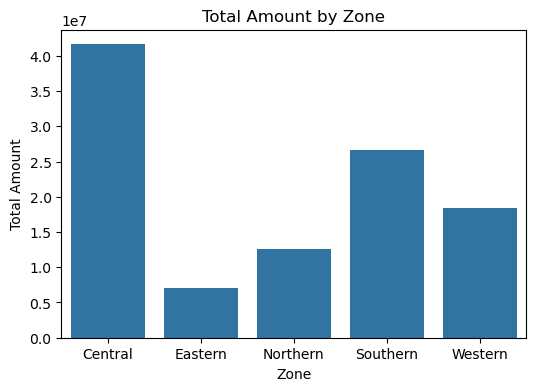

In [103]:
plt.figure(figsize=(6,4))
sns.barplot(x=zone_amount.index, y=zone_amount.values)
plt.title("Total Amount by Zone")
plt.ylabel("Total Amount")
plt.xlabel("Zone")
plt.show()

In [104]:
print("\nCount of Occupations by Zone:")
zone_occ = df[['Zone', 'Occupation']].value_counts().head(10)
print(zone_occ.sort_values(ascending=False))


Count of Occupations by Zone:
Zone      Occupation 
Central   IT Sector      638
          Healthcare     532
          Aviation       501
          Banking        405
Southern  IT Sector      364
          Healthcare     344
Central   Govt           337
Southern  Aviation       320
          Banking        284
Central   Hospitality    270
Name: count, dtype: int64


### insights by zone

#### Product Preference: Food and Clothing & Apparel dominate (Central & Western zones).
#### Orders: Central leads (10k), followed by Southern (6.7k).
#### Revenue: Central highest (₹41.6M), Southern (₹26.6M).
#### Occupations: IT, Healthcare, Banking buyers dominate (mostly Central).
#### Overall: Central strongest, Eastern weakest.

# occupation

#### How do Product Categories, Total Orders, and Total Revenue vary across different Occupations?

In [111]:
print("\nCount of Product Categories by Occupation:")
occ_product = df[['Occupation', 'Product_Category']].value_counts().head(10)
print(occ_product.sort_values(ascending=False))



Count of Product Categories by Occupation:
Occupation  Product_Category     
Healthcare  Clothing & Apparel       361
IT Sector   Clothing & Apparel       351
            Food                     344
Healthcare  Food                     330
Aviation    Food                     312
IT Sector   Electronics & Gadgets    293
Aviation    Clothing & Apparel       281
Banking     Clothing & Apparel       274
            Electronics & Gadgets    252
Aviation    Electronics & Gadgets    241
Name: count, dtype: int64


In [113]:
df.groupby('Occupation')['Orders'].sum().sort_values(ascending=False).head(5)

Occupation
IT Sector     4002
Healthcare    3455
Aviation      3212
Banking       2819
Govt          2155
Name: Orders, dtype: int64

In [115]:
df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(5)

Occupation
IT Sector     14782407.00
Healthcare    13034587.49
Aviation      12599994.00
Banking       10786828.95
Govt           8517212.00
Name: Amount, dtype: float64

### Insights by Occupation

### Product Preference: Clothing & Apparel and Food are most purchased, especially by Healthcare and IT Sector professionals.
### Orders: IT Sector placed the maximum orders (4002), followed by Healthcare (3455) and Aviation (3212).
### Revenue: IT Sector generated the highest revenue (₹14.7M), followed by Healthcare (₹13.0M) and Aviation (₹12.6M).

# product_id 

### How do Orders and Revenue vary across different Product IDs  and Which are the top 10 products by revenue

In [121]:
print("\nTotal Orders by Product ID:")
prod_orders = df.groupby('Product_ID')['Orders'].sum().head()
print(prod_orders)


Total Orders by Product ID:
Product_ID
P00000142    57
P00000242    15
P00000342    16
P00000442     1
P00000542     6
Name: Orders, dtype: int64


In [123]:
print("\nTotal Amount by Product ID:")
prod_amount = df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head()
print(prod_amount)


Total Amount by Product ID:
Product_ID
P00265242    540136.0
P00110942    424833.0
P00184942    401816.0
P00112142    341020.0
P00059442    338571.0
Name: Amount, dtype: float64


In [125]:
# Top 10 Products by Amount
top_products = df.groupby("Product_ID")["Amount"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products:\n", top_products)


Top 10 Products:
 Product_ID
P00265242    540136.0
P00110942    424833.0
P00184942    401816.0
P00112142    341020.0
P00059442    338571.0
P00237542    322363.0
P00058042    307040.0
P00110742    294548.0
P00110842    290661.0
P00080342    283309.0
Name: Amount, dtype: float64


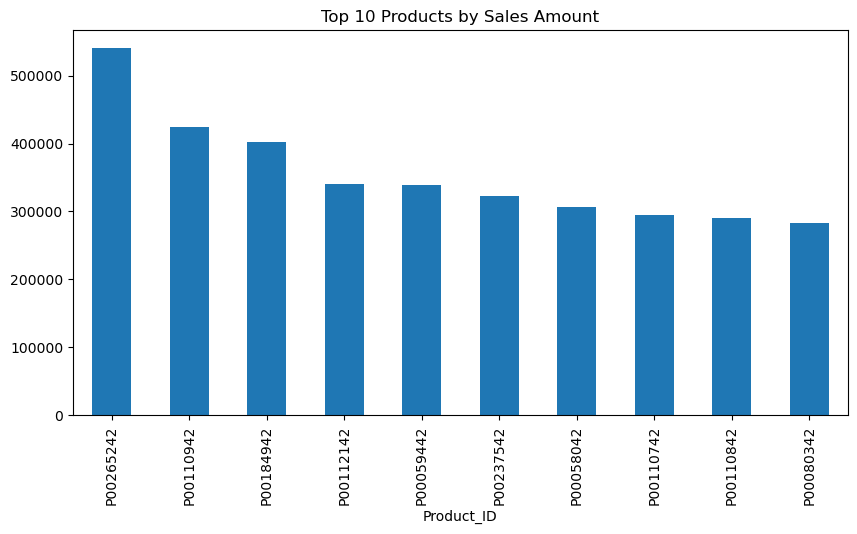

In [127]:
top_products.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Products by Sales Amount")
plt.show()

### insight by product_id

### Orders: Product P00000142 leads with 57 orders, followed by P00000242 (15 orders).
### Revenue: Product P00265242 also generates the highest revenue (₹540136.0), followed by P00110942 (₹424833.0).
### Top Revenue Products: IDs like P00265242, P00119442, P00295442, P00257442 .


# State

### How do Product Category counts, total Orders, and total Amount vary across different States?

In [133]:
print("\nCount of Product Categories by State:")
counts = df[['State', 'Product_Category']].value_counts().sort_values(ascending=False).head()
print(counts)


Count of Product Categories by State:
State          Product_Category  
Uttar Pradesh  Food                  569
               Clothing & Apparel    489
Maharashtra    Food                  480
Karnataka      Footwear & Shoes      339
Delhi          Footwear & Shoes      338
Name: count, dtype: int64


In [135]:
df.groupby('State')['Orders'].sum().sort_values(ascending=False)

State
Uttar Pradesh       4809
Maharashtra         3799
Karnataka           3241
Delhi               2744
Madhya Pradesh      2259
Andhra Pradesh      2054
Himachal Pradesh    1568
Kerala              1137
Haryana             1106
Gujarat             1067
Bihar               1058
Jharkhand            953
Uttarakhand          824
Rajasthan            555
Punjab               495
Telangana            312
Name: Orders, dtype: int64

In [137]:
df.groupby('State')['Amount'].sum().sort_values(ascending=False)

State
Uttar Pradesh       19362273.00
Maharashtra         14412576.00
Karnataka           13531649.00
Delhi               11628146.45
Madhya Pradesh       8117360.00
Andhra Pradesh       8045255.99
Himachal Pradesh     4963368.00
Haryana              4217871.00
Bihar                4014669.00
Gujarat              3954377.00
Kerala               3894491.99
Jharkhand            3026456.00
Uttarakhand          2520944.00
Rajasthan            1909409.00
Punjab               1525800.00
Telangana            1151490.00
Name: Amount, dtype: float64

#### insight by state

#### Product Preference: Food and Clothing & Apparel are most purchased, especially in Uttar Pradesh, Maharashtra, Delhi, and Karnataka.
#### Orders :Uttar Pradesh placed the maximum orders (4813), followed by Maharashtra (3811) and Karnataka (3241).
#### Revenue: Uttar Pradesh generated the highest revenue (₹19.3M), followed by Maharashtra (₹14.4M) and Delhi (₹13.5M).

# customer name

### Find out top 10 customer by Amount

In [143]:
# Top 10 Customers by Amount
top_customers = df.groupby("Cust_name")["Amount"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers:\n", top_customers)

Top 10 Customers:
 Cust_name
Vishakha     382782.0
Sudevi       287142.0
Vasudev      281034.0
Neola        275234.0
Alejandro    272517.0
Aastha       266961.0
Shreyshi     265603.0
Hazel        242343.0
Akshat       241349.0
Gopal        239147.0
Name: Amount, dtype: float64


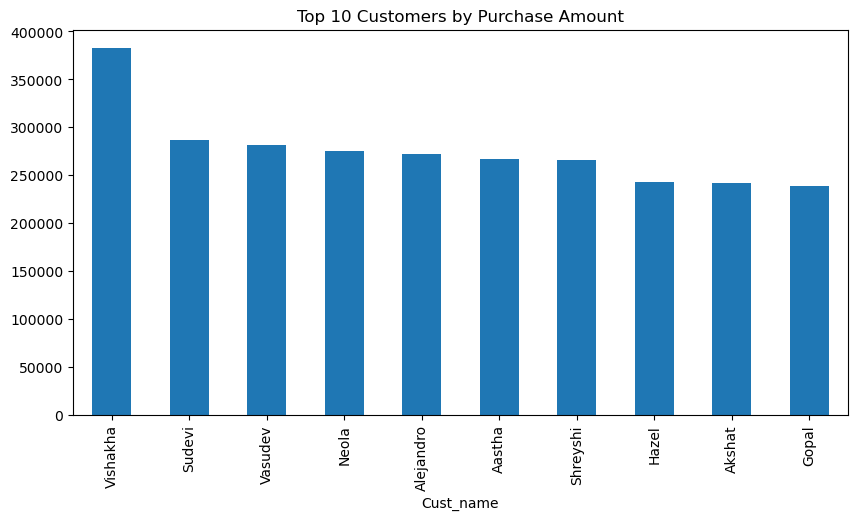

In [145]:
top_customers.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Customers by Purchase Amount")
plt.show()

# Multivariate Analysis

In [147]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


### How do total Orders and Revenue vary across different Age Groups and Gender, and which segment contributes the most?

In [152]:
df.groupby(["Age Group", "Gender"])[["Orders", "Amount"]].sum().sort_values(by=["Amount", "Orders"], ascending=[False, False]).head()

,,Orders,Amount
Age Group,Gender,,
26-35,F,8210,30961857.94
36-45,F,3908,15524425.49
18-25,F,3261,11887003.00
26-35,M,3171,11636129.00
46-50,F,1682,6767720.00


#### Insight

#### The female customers aged 26–35 are the biggest drivers of sales, both in terms of order volume and revenue. Younger females (18–25) and middle-aged females (36–45) also contribute significantly


### How do total Orders and Revenue vary across different States and Zones, and which State–Zone combinations contribute the most?

In [157]:
df.groupby(["State", "Zone"])[["Orders", "Amount"]].sum().sort_values(
    by=["Amount", "Orders"], ascending=[False, False]
).head()


,,Orders,Amount
State,Zone,,
Uttar Pradesh,Central,4809,19362273.00
Maharashtra,Western,3799,14412576.00
Karnataka,Southern,3241,13531649.00
Delhi,Central,2744,11628146.45
Madhya Pradesh,Central,2259,8117360.00


#### Insight

#### Uttar Pradesh – Central Zone is the top-performing state–zone combination in both revenue and orders.
#### Other high contributors include Maharashtra (Western) and Karnataka (Southern).

### How do Orders and Revenue vary across different Occupations and Gender, and which segment generates the highest sales

In [162]:
df.groupby(["Occupation", "Gender"])[["Orders", "Amount"]].sum().sort_values(
    by="Amount", ascending=False).head()


,,Orders,Amount
Occupation,Gender,,
IT Sector,F,2701,10217271.00
Aviation,F,2299,9005089.00
Healthcare,F,2403,8968232.49
Banking,F,2034,7808513.95
Govt,F,1507,6002907.00


#### Insight

#### Female professionals in the IT Sector generate the highest sales, followed by those in Aviation and Healthcare. This indicates that working women in high-income and service-oriented professions are key buyers

### Which Product Categories generate the highest Revenue and Orders, and which category is the top performer overall

In [167]:
df.groupby("Product_Category")[["Orders", "Amount"]].sum().reset_index().sort_values(
    by="Amount", ascending=False).head()


,Product_Category,Orders,Amount
6,Food,6120,33958210.50
3,Clothing & Apparel,6627,16484472.00
7,Footwear & Shoes,2654,15615754.45
5,Electronics & Gadgets,5208,15607657.00
8,Furniture,890,5448160.99


#### Insight

#### Food is the highest revenue generator, while Clothing & Apparel leads in order volume.
#### Footwear & Shoes and Electronics & Gadgets also perform strongly, showing balanced demand.
#### Furniture has the least contribution among the top categories.